In [1]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
from numpy import sin, cos, pi
import math
imgNum=13
# тут моделируется прием сигнала оптоволоконным датчиком от плоской волны для разных параметров спирали

Длина волны lp - единичная
скорость звука тоже
R - радиус спирали в единицах длин волн
q - шаг спирали
L - база приема
Направление прихода волны задается полярными углами - phi - в горизонтальной плоскости; theta - в вертикальной


In [2]:
# def wave(r:np.array, t, phi, theta):
#     """
#     Это функция смещения.
#     :argument
#     t время. Менять от 0 до 1, чтобы фаза изменилась на 2Pi
#     r - массив координат [xyz]
#     """
#     k = 2*np.pi*np.array([np.cos(theta)*np.cos(phi), np.cos(theta)*np.sin(phi), np.sin(theta)])
#     return k*np.sin(np.sum(k*r) - 2*np.pi*t)
#
# def deform(r:np.array, t, phi, theta):
#     # return np.ones((3, 3))
#     """
#     Это функция деформации (производная по смещению)
#     :argument
#     t время. Менять от 0 до 1, чтобы фаза изменилась на 2Pi
#     r - массив координат [xyz]
#     theta - угол между вектором и горизонатльной плосколстью
#     phi - угол между вериткальной плоскостью через вектор и осью x
#     :returns
#     вектор деформации в направлении деформации
#     """
#     k = 2*np.pi*np.array([np.cos(theta)*np.cos(phi), np.cos(theta)*np.sin(phi), np.sin(theta)])
#     return np.expand_dims(k, axis=1)*k*np.sin(np.sum(k*r) - 2*np.pi*t)
#


In [51]:
def generate_spiral(R, q, phiMax, L=None):
    dphi = 0.01  # шаг разбиения по углу
    dL = min(R/8, 0.05)
    # dphi = dL/np.sqrt(R*R + (q/2/np.pi)**2)
    if L is not None:
        phiMax = L/np.sqrt(R*R+q*q/(4*np.pi*np.pi))
    phi = np.arange(0, phiMax, dphi)
    return np.array( [R * np.sin(phi) * dphi, R * np.cos(phi) * dphi, np.ones_like(phi)*q * dphi / 2 / np.pi]).transpose()



In [23]:
class Deformer:

    def __init__(self, theta, phi=np.pi/8):
        self.phi=phi
        self.theta=theta
        self.k = 2*np.pi*np.array([np.cos(theta)*np.cos(phi), np.cos(theta)*np.sin(phi), np.sin(theta)])
        self.def0 = np.expand_dims(self.k, axis=1)*self.k

    def val(self, r, t):
        return self.def0 + 0*np.sin(np.sum(self.k*r) - 2*np.pi*t)


In [24]:
def count_signal(elements, coords, theta, t, phi=np.pi/8):
    result = 0
    # log = []
    deformer = Deformer(theta, phi=phi)
    elementLength = norm(elements[0])
    for i in range(len(elements)):
        # log.append(np.sum(deform(coords[i], t, np.pi/2, theta)*elements[i]*np.expand_dims(elements[i], axis=1))/norm(elements[i]))
        result += np.sum(deformer.val(coords[i], t)*elements[i]*np.expand_dims(elements[i], axis=1))/elementLength
    # plt.plot(log)
    return result

def count_theta_diagram(elements, coords, plot=False, tn=8):
    result = []
    for theta in np.arange(0, 2*np.pi, 0.05):
        signals = np.zeros(tn)
        for t, i in zip(np.linspace(0, 1, tn, endpoint=False), np.arange(tn)):
            signals[i] = (count_signal(elements, coords, theta, t))
        if 1 < theta <= 1.05 and plot:
            plt.plot(signals)
            plt.show()
        result.append((signals*signals).mean())
    return np.arange(0, 2*np.pi, 0.05), result

def count_phi_diagram(elements, coords, theta, plot=False, tn=8):
    result = []
    for phi in np.arange(0, 2*np.pi, 0.05):
        signals = np.zeros(tn)
        for t, i in zip(np.linspace(0, 1, tn, endpoint=False), np.arange(tn)):
            signals[i] = (count_signal(elements, coords, theta, t, phi=phi))
        if 1 < theta <= 1.05 and plot:
            plt.plot(signals)
            plt.show()
        result.append((signals*signals).mean())
    return np.arange(0, 2*np.pi, 0.05), result

In [40]:
'''параметры спирали:
R - радиус
h - шаг спирали по высоте
phiMax - суммарный угол закручивания спирали в радианах'''
R = 0.1
q = 0.443
L = 0.2


phiMax = L/np.sqrt(R*R+q*q/(4*np.pi*np.pi))
phiMax = math.ceil(phiMax/(2*np.pi))*2*np.pi
L = phiMax*np.sqrt(R*R+q*q/(4*np.pi*np.pi))
phiMax, L

(6.283185307179586, 0.76878682093515)

In [52]:

elements = generate_spiral(R, q, None, L)
coords = np.cumsum(elements, axis=0)

In [42]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 10))
ax  = fig.add_subplot(projection='3d')
ax.plot(coords[:, 0], coords[:, 1], coords[:, 2])

<IPython.core.display.Javascript object>

In [48]:
%matplotlib inline

# $\theta$ диаграмма

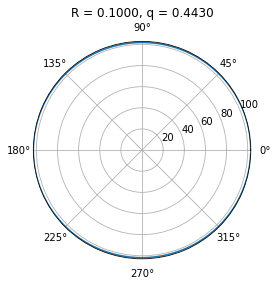

In [53]:
diag = count_theta_diagram(elements, coords)
plt.polar(*diag)
plt.title(f"R = {R:.4f}, q = {q:.4f}")
plt.savefig(f"diagram/{imgNum}.png", dpi=200)
imgNum+=1

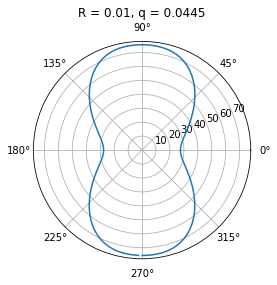

In [7]:
plt.polar(*diag)
plt.title(f"R = {R:.4f}, q = {q:.4f}")
plt.savefig(f"diagram/{imgNum}.png", dpi=200)
imgNum+=1

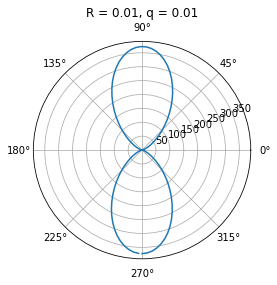

In [151]:
plt.polar(*diag)
plt.title(f"R = {R:.4f}, q = {q:.4f}")
plt.savefig(f"diagram/{imgNum}.png", dpi=200)
imgNum+=1

# $\phi$ Диаграмма

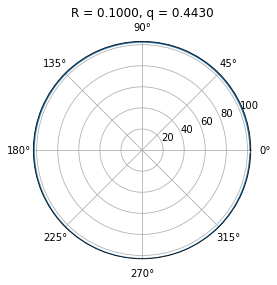

In [54]:
diag = count_phi_diagram(elements, coords, -np.pi/6, tn=1)
plt.polar(*diag)
plt.title(f"R = {R:.4f}, q = {q:.4f}")
plt.savefig(f"diagram/{imgNum}.png", dpi=200)
imgNum+=1

# Зависимость от длины волны и длины база приема

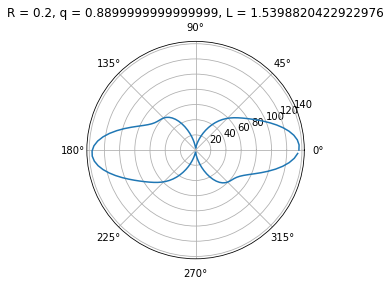

In [77]:
for coef in np.linspace(20, 20, 1):
    R = 0.01*coef
    q = 0.0445*coef
    L = 0.07*coef
    phiMax = L/np.sqrt(R*R+q*q/(4*np.pi*np.pi))
    phiMax = math.ceil(phiMax/(2*np.pi))*2*np.pi
    L = phiMax*np.sqrt(R*R+q*q/(4*np.pi*np.pi))


    elements = generate_spiral(R, q, None, L)
    coords = np.cumsum(elements, axis=0)
    diag = count_theta_diagram(elements, coords, tn=20)
    plt.polar(*diag)
    plt.title(f"R = {R:.4f}, q = {q:.4f}, L = {L:.4f}")
    plt.savefig(f"diagram/wave_contr/{imgNum}.png", dpi=200)
    plt.show()
    imgNum+=1

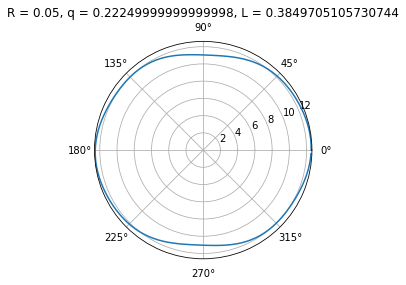

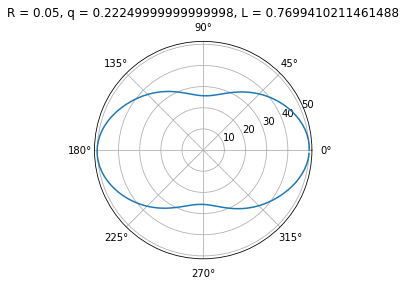

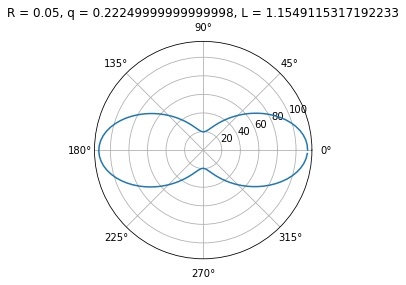

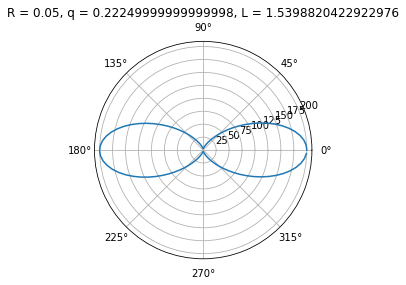

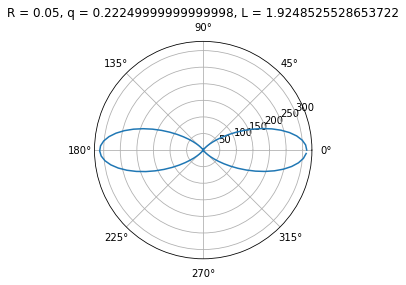

In [78]:
for phiMax in 2*np.pi*np.linspace(1, 5, 5):
    coef = 5
    R = 0.01*coef
    q = 0.0445*coef
    # phiMax = L/np.sqrt(R*R+q*q/(4*np.pi*np.pi))
    # phiMax = math.ceil(phiMax/(2*np.pi))*2*np.pi
    L = phiMax*np.sqrt(R*R+q*q/(4*np.pi*np.pi))

    elements = generate_spiral(R, q, None, L)
    coords = np.cumsum(elements, axis=0)
    diag = count_theta_diagram(elements, coords)
    plt.polar(*diag)
    plt.title(f"R = {R:.4f}, q = {q:.4f}, L = {L:.4f}")
    plt.savefig(f"diagram/Lchange/{imgNum}.png", dpi=200)
    plt.show()
    imgNum+=1